# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [175]:
#Sua resposta aqui
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("carros.csv")

tipos = [str(dtype) for dtype in df.dtypes.unique()]
print("Existem",df.shape[0], "dados e", df.shape[1], "atributos nesse dataset. Existem", df.isnull().sum().sum(), "valores faltantes.\nTipo dos dados:", tipos)

df.head(15)

Existem 4345 dados e 9 atributos nesse dataset. Existem 322 valores faltantes.
Tipo dos dados: ['object', 'float64', 'int64']


,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [176]:
#Sua resposta aqui
df = df.rename(columns={"Mileage/1000": "Quilometragem", "Brand": "Marca", "Price": "Preço", "EngineV": "Motor", "Engine Type": "Tipo", 
                        "Registration": "Cadastro", "Year": "Ano", "Model": "Modelo", "Body": "Corpo"})
df["Quilometragem"] = df["Quilometragem"] * 1.60934 * 1000
df.head(5)

,Marca,Preço,Corpo,Quilometragem,Motor,Tipo,Cadastro,Ano,Modelo
0,BMW,4200.0,sedan,445787.18,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,687188.18,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576143.72,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,386241.60,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,193120.80,2.0,Petrol,yes,2011,Rav 4


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

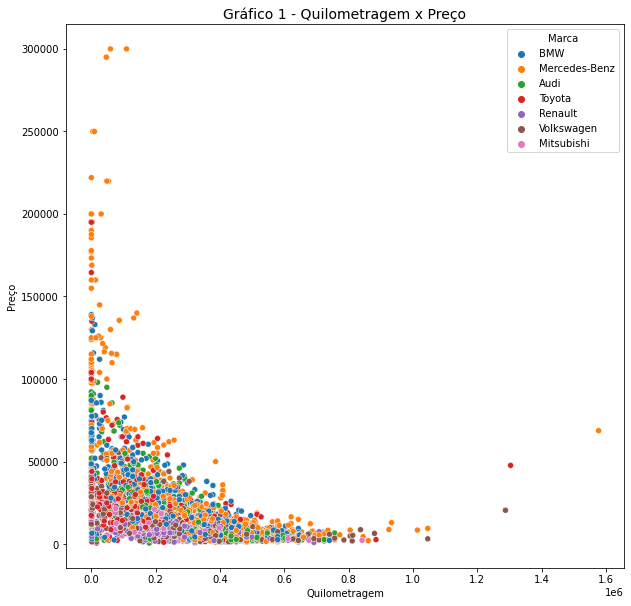

In [177]:
#Sua resposta aqui

df = df.dropna()

plt.figure(figsize=(10, 10))

fig1 = sns.scatterplot(x='Quilometragem', y='Preço', hue='Marca', data=df)

fig1.set_title('Gráfico 1 - Quilometragem x Preço', fontsize = 14)

plt.show()

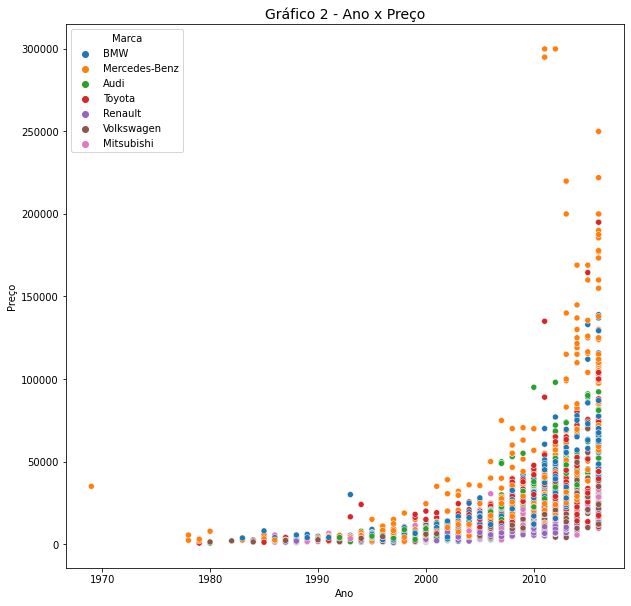

In [178]:
plt.figure(figsize=(10, 10))

fig2 = sns.scatterplot(x='Ano', y='Preço', hue='Marca', data=df)

fig2.set_title('Gráfico 2 - Ano x Preço', fontsize = 14)

plt.show()

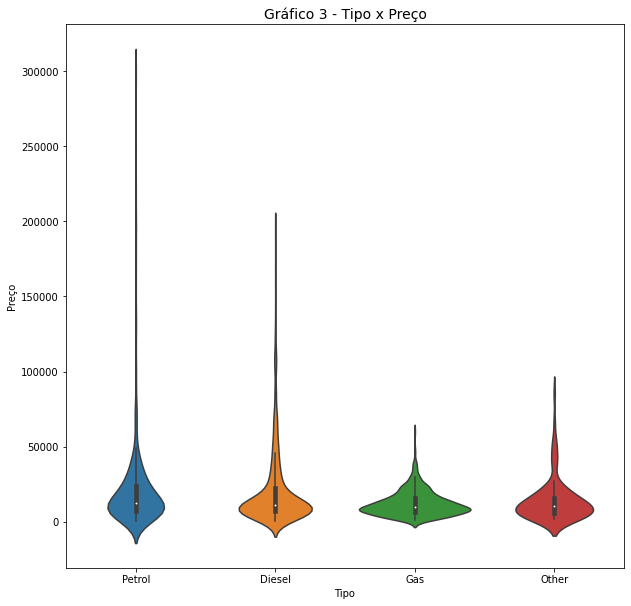

In [179]:
plt.figure(figsize=(10, 10))

fig3 = sns.violinplot(y='Preço', x='Tipo', data=df)

fig3.set_title('Gráfico 3 - Tipo x Preço', fontsize = 14)

plt.show()

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: Modelo de regressão. Porque estamos em busca do preço do veículo, que pode variar de acordo com todos os atributos envolvidos. Não é nosso objetivo classificá-lo em uma categoria específica.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: Regressão linear simples e múltipla, RandomForestRegressor. 

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Regressão linear simples e múltipa

Algoritmo 2: RandomForestRegressor

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [180]:
#Sua resposta aqui
X = df[['Ano']]
y = df[['Preço']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [181]:
#Sua resposta aqui
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('O resultado do r2 foi: ' + str(r2_score(y_test, y_pred)))
print('O resultado do RMSE foi: ' + str(np.sqrt(mean_absolute_error(y_test, y_pred))))

O resultado do r2 foi: 0.2545843656393343
O resultado do RMSE foi: 111.50177249468928


In [182]:
df['Marca'] = df['Marca'].replace('BMW', 1).replace('Mercedes-Benz', 2).replace('Audi', 3).replace('Toyota', 4).replace('Renault', 5).replace('Volkswagen', 6).replace('Mitsubishi', 7)
df['Tipo'] = df['Tipo'].replace('Petrol', 1).replace('Diesel', 2).replace('Gas', 3).replace('Other', 4)

X = df[['Ano', 'Quilometragem', 'Motor', 'Marca', 'Tipo']]
y = df[['Preço']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('O resultado do r2 foi: ' + str(r2_score(y_test, y_pred)))
print('O resultado do RMSE foi: ' + str(np.sqrt(mean_absolute_error(y_test, y_pred))))

O resultado do r2 foi: 0.38796624443899896
O resultado do RMSE foi: 107.83007179236206


7.2 - Algoritmo 2:  (0,5)

In [183]:
#Sua resposta aqui
X = df[['Ano', 'Quilometragem', 'Motor', 'Marca', 'Tipo']]
y = df[['Preço']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('O resultado do r2 foi: ' + str(r2_score(y_test, y_pred)))
print('O resultado do RMSE foi: ' + str(np.sqrt(mean_absolute_error(y_test, y_pred))))

O resultado do r2 foi: 0.9064146837479653
O resultado do RMSE foi: 61.30591776047712


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: O algoritmo RandomForestRegressor obteve melhor resultado levando em consideração o dataset analisado. O r2 e o RMSE tiveram scores melhores nas amostras com esse algoritmo.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [184]:
#Sua resposta aqui
#Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?

np.random.seed(42)

prediction = rf.predict([[2005, 172095, 2.0, 6, 1]])
print('O preço do carro é aproximadamente: {}'.format(prediction))

O preço do carro é aproximadamente: [8046.4]
